<font size="+3"><b>Final Project: PCA and Clustering
</b></font>

***
* **Full Name** = Brian Chu
* **UCID** = 30152819
***

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

<font color='Red'>
For this assignment, in addition to your .ipynb file, please also attach a PDF file. To generate this PDF file, you can use the print function (located under the "File" within Jupyter Notebook). Name this file ENGG444_Final_Project_yourUCID.pdf (this name is similar to your main .ipynb file). We will evaluate your assignment based on the two files and you need to provide both.
</font>


|                 **Question**                | **Point(s)** |
|:-------------------------------------------:|:------------:|
| **1. Principle Component   Analysis (PCA)** |              |
|                     1.1                     |       3      |
|                     1.2                     |       2      |
|                     1.3                     |       2      |
|                     1.4                     |       3      |
|                     1.5                     |       6      |
|                     1.6                     |       2      |
|         **2. Pipeline and Modeling**        |              |
|                     2.1                     |       3      |
|                     2.2                     |       2      |
|                     2.3                     |       2      |
|                     2.4                     |       3      |
|            **3. Bonus Question**            |     **2**    |
|                    Total                    |      28      |

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [78]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

--2024-04-10 02:51:18--  https://archive.ics.uci.edu/static/public/236/seeds.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seeds.zip’

seeds.zip               [ <=>                ]   9.21K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-04-10 02:51:19 (121 MB/s) - ‘seeds.zip’ saved [9432]

Archive:  seeds.zip
 extracting: seeds_dataset.txt       


In [79]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

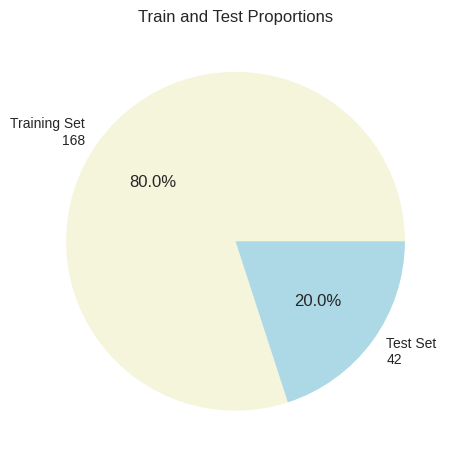

In [80]:
# 1.1
# Add necessary code here.
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# def getValues(pct, data):



X = data.drop('Type', axis=1)
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

train_proportion = len(X_train) / len(data) * 100
test_proportion = len(X_test) / len(data) * 100

plt.figure()
plt.pie([len(X_train), len(X_test)], labels=['Training Set\n{:d}'.format(len(X_train)), 'Test Set\n{:d}'.format(len(X_test))], autopct='%1.1f%%', colors=("beige", "lightblue"))
plt.title('Train and Test Proportions')
plt.show()

<font color='Green'><b>Answer:</b></font>

- **1.1** .....................

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


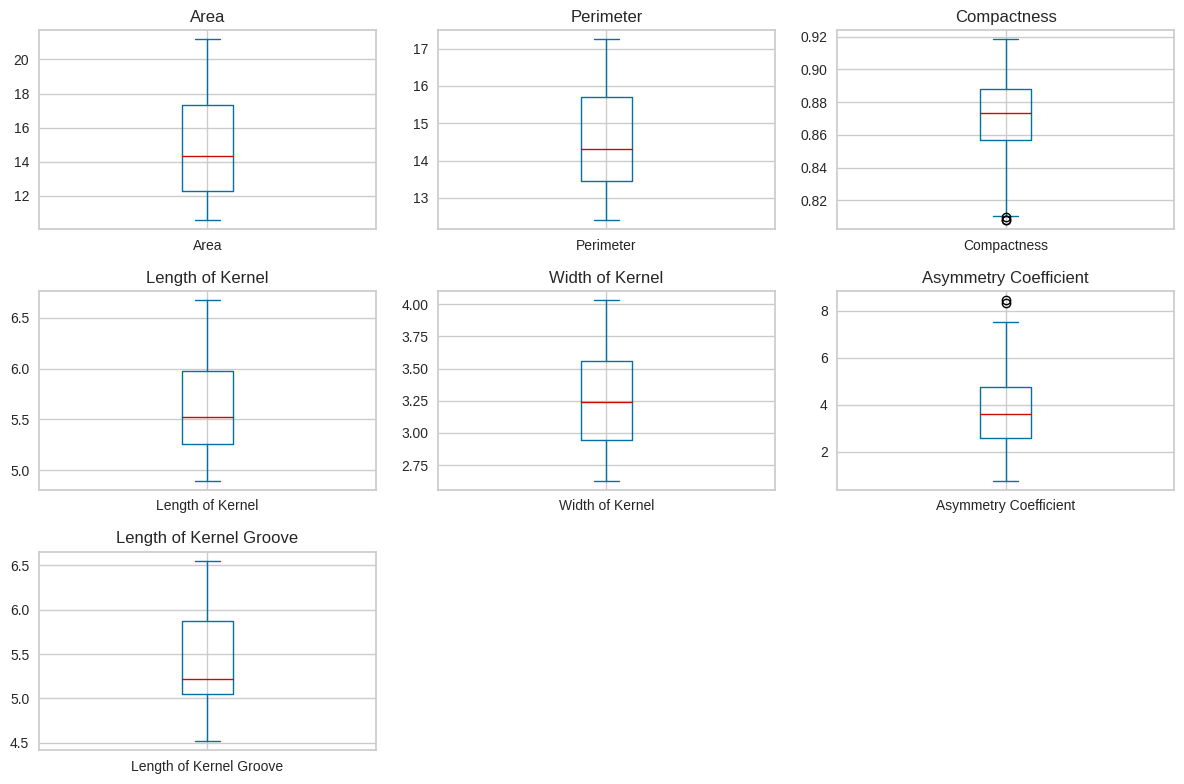

In [81]:
data_to_plot = data.drop(columns=['Type'])

plt.figure(figsize=(12, 8))
for i, column in enumerate(data_to_plot.columns):
    plt.subplot(3, 3, i+1)
    data_to_plot[column].plot(kind='box')
    plt.title(column)
plt.tight_layout()
plt.show()

<font color='Green'><b>Answer:</b></font>

- **1.2** .....................

We want to use scaling because in a SVM, a feature that is on a larger scale can dominate the function, and as such we need to use scaling to make each feature have the same weight. As seen above, while there are a few outliers in Compactness and Asymmetry Coefficient, they are close enough to the boundary that we do not need to use robust scaling to reduce their effects.

In this case, I decided to use Standard scaler as it maintains the relationship between points while also standardizing all the data onto the same scale, allowing for equal weights.

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [82]:
# 1.3
# Add necessary code here.

<font color='Green'><b>Answer:</b></font>

- **1.3** .....................

As we are trying to predict for Type, which has 3 different values, we know that we are trying to do classification. As SVM is a powerful model that performs well on many different datasets and works on both high and low dimensional data, SVM's strengths work well for the situation. The weaknesses of SVM include memory or runtime issues when presented with too much data, and the need for careful preprocessing and tuning. The issue with memory and runtime can be ignored as our training and testing data added together is only 210 data points, and as we will be doing both scaling as well as hyperparameter tuning, the need for careful preprocessing and tuning is no longer a problem.

```
Considering that we are doing classification, 2 main algorithms come to should be considered, random forest, and gradient boosting. We next need to consider the differences between the 2 models. As written in the slides, while gradient boosting needs better parameter tuning, if the parameter is tuned well, the accuracy is expected to be better, and as we will be doing hyperparameter optimization, we should be tuning parameters well and as such should use Gradient Boosting.
```

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [83]:
# 1.4
# Add necessary code here.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.01, 0.1, 1, 10, 100, 1000],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring="accuracy")

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_model = grid_search.best_estimator_

Best hyperparameters: {'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


<font color='Green'><b>Answer:</b></font>

- **1.4** .....................

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [84]:
# 1.5
# Add necessary code here.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

grid_search_pca = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring="accuracy")

grid_search_pca.fit(X_train_pca, y_train)

best_params_pca = grid_search_pca.best_params_
print("Best hyperparameters with reduced data:", best_params_pca)

best_model_pca = grid_search_pca.best_estimator_

Best hyperparameters with reduced data: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


<font color='Green'><b>Answer:</b></font>

- **1.5** .....................

As my gridsearch found the best svm kernel to be linear, that implies that the data is linear. As the main benefit to using t-SNE over PCA is that t-SNE can be used for non-linear data, I will be using PCA as PCA is great for linear relationships.

### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

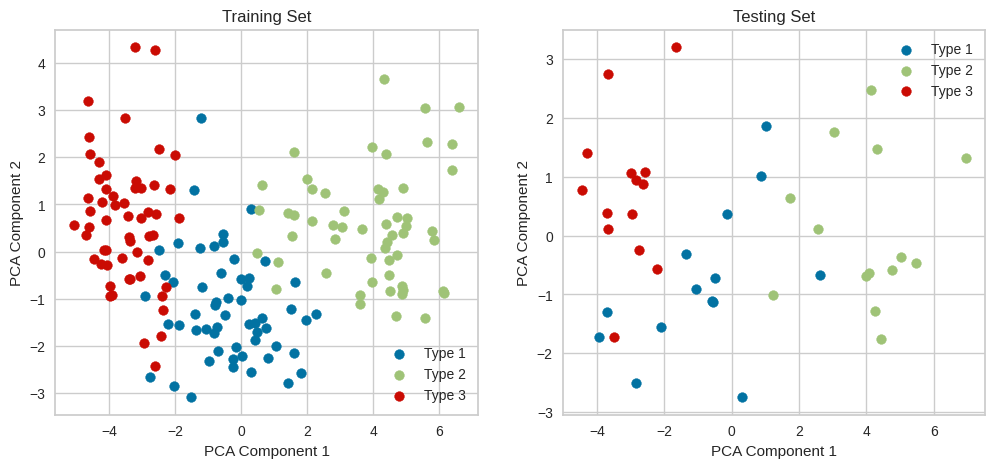

In [85]:
# 1.6
# Add necessary code here.
import matplotlib.pyplot as plt
import numpy as np

def plot_scatter_with_legend(ax, X, y, title):

    for t in np.unique(y):
        indices = np.where(y == t)[0]

        ax.scatter(X[indices, 0], X[indices, 1], label=f'Type {t}')

    ax.set_title(title)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plot_scatter_with_legend(axs[0], X_train_pca, y_train, 'Training Set')

plot_scatter_with_legend(axs[1], X_test_pca, y_test, 'Testing Set')

plt.show()


## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

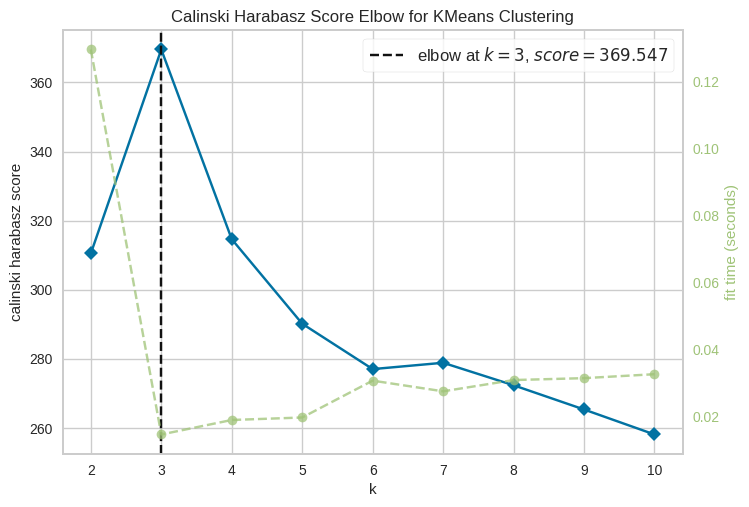

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], metric='calinski_harabasz')

visualizer.fit(data)
visualizer.show()

<font color='Green'><b>Answer:</b></font>

- **2.1** .....................

First, as the Calinski Harabasz score is highest at 3, that tells us that the optimal number of clusters is 3. Next, we can talk about the score. In this situation, we got a Calinski Harabasz score(index) of 369.547 which is pretty high, suggesting a good clustering result. Futhermore, as higher scores indicate better defined and more compact clusters, it implies that the variance between clusters is higher than the variance within clusters, again impling a good clustering result.

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [87]:
# 2.2
# Add necessary code here.
pipeline.set_params(kmeans__n_clusters=3)
pipeline.fit(data)

labels = pipeline.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [88]:
# 2.3
# Add necessary code here.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

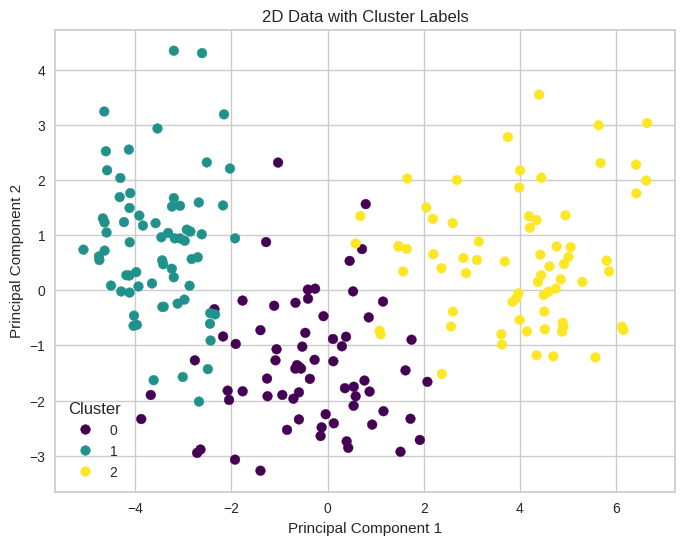

In [89]:
# 2.4
# Add necessary code here.
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.title('2D Data with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

handles, _ = scatter.legend_elements()
labels_str = [str(label) for label in unique_labels]
plt.legend(handles, labels_str, title='Cluster')

plt.show()

## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

- **Bonus Question** .....................

The main thing that can be seen is that although there is a bit of overlap between 0,1 and 0,2, in general, the clusters are well defined, with little overlap. The clusters have decent density, generally being able to tell where the center of a cluster is by the amount of points surrounding it. There are a few points that are far from the center of the cluster, but with a few exceptions, it is still closest to the center of its own type of cluster. In general, the graph further supports the Calinski Harabasz score in its implication of good and well defined clustering